## Alan Kessler Bonus Calculations 2

### Chapter 4 C&H Exercise 4.6 Parts 1,4,6

The following graphs are used to verify some of the assumptions of the ordinary least squares regression of $Y$ on $X_1, X+2, ..., X_p$:

For each of these graphs:

a) What assumption can be verified by the graph?

b) Draw an example of the graph where the assumption does not seem to be violated.

c) Draw an example of the graph which indicates the violation of the assumption.

#### 1. The scatter plot of $Y$ versus each predictor $X_j$.

a) The linearity asssumption - that the relationship between $Y$ and the predictor $X_j$ is linear. 

b)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['figure.figsize'] = [3, 3]

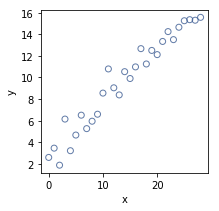

In [2]:
np.random.seed(2)
x = list(range(0,29))
y = [3+0.5*i+np.random.normal(0,1,1)[0] for i in x]
df = pd.DataFrame(x, y).reset_index()
df.columns = ['y', 'x']

sc = sns.regplot(x="x", y="y", data=df, fit_reg=False, 
                 line_kws={'color': 'black'},
                 scatter_kws={'edgecolors': sns.xkcd_rgb["denim blue"], 
                              'facecolors': 'None',
                              'linewidth': 1})        
plt.show()

c)

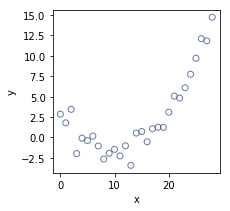

In [3]:
# c
yFalse = [3+0.05*i**2-i+np.random.normal(0,1,1)[0] for i in x]
df = pd.DataFrame(x, yFalse).reset_index()
df.columns = ['y', 'x']

sc = sns.regplot(x="x", y="y", data=df, fit_reg=False, 
                 line_kws={'color': 'black'},
                 scatter_kws={'edgecolors': sns.xkcd_rgb["denim blue"], 
                              'facecolors': 'None',
                              'linewidth': 1})        
plt.show()

#### 4. The residuals vs fitted values

a) The constant variance assumption

b)

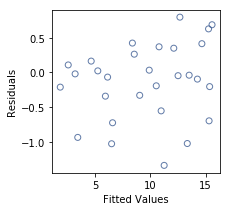

In [4]:
# b
Res = [np.random.normal(0,.5,1)[0] for i in x]
df = pd.DataFrame(y, Res).reset_index()
df.columns = ['Residuals', 'Fitted Values']

sc = sns.regplot(x="Fitted Values", y="Residuals", data=df, fit_reg=False, 
                 line_kws={'color': 'black'},
                 scatter_kws={'edgecolors': sns.xkcd_rgb["denim blue"], 
                              'facecolors': 'None',
                              'linewidth': 1})        
plt.show()

c)

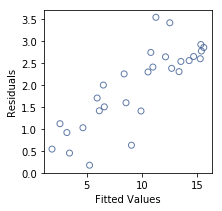

In [5]:
# c
Res = [0.2*i+np.random.normal(0,.5,1)[0] for i in y]
df = pd.DataFrame(y, Res).reset_index()
df.columns = ['Residuals', 'Fitted Values']

sc = sns.regplot(x="Fitted Values", y="Residuals", data=df, fit_reg=False, 
                 line_kws={'color': 'black'},
                 scatter_kws={'edgecolors': sns.xkcd_rgb["denim blue"], 
                              'facecolors': 'None',
                              'linewidth': 1})        
plt.show()

#### 6. Index Plot of Cook's Distance

a) The assumption that all observations are equally reliable and have an approximately equal role in determining the regression results and in influencing conclusions.

b)

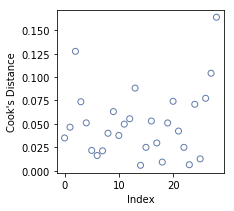

In [6]:
x = list(range(0,29))
y = [np.absolute(np.random.normal(0,0.05,1)[0]) for i in x]
df = pd.DataFrame(x, y).reset_index()
df.columns = ["Cook's Distance", "Index"]
sc = sns.regplot(x="Index", y="Cook's Distance", data=df, fit_reg=False, 
                 line_kws={'color': 'black'},
                 scatter_kws={'edgecolors': sns.xkcd_rgb["denim blue"], 
                              'facecolors': 'None',
                              'linewidth': 1})        
plt.show()

c)

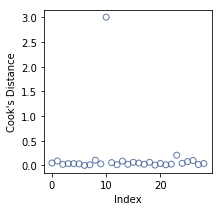

In [7]:
x = list(range(0,29))
y = [np.absolute(np.random.normal(0,0.05,1)[0]) for i in x]
y[10] = 3
df = pd.DataFrame(x, y).reset_index()
df.columns = ["Cook's Distance", "Index"]
sc = sns.regplot(x="Index", y="Cook's Distance", data=df, fit_reg=False, 
                 line_kws={'color': 'black'},
                 scatter_kws={'edgecolors': sns.xkcd_rgb["denim blue"], 
                              'facecolors': 'None',
                              'linewidth': 1})        
plt.show()

### Chapter 5 C&H Exercise 5.5 Parts a,c,e,g,h,i

Table 5.15 shows a regression output obtained from fitting the model $Y=\beta_0+\beta_1 X +\epsilon$ to a set of data consisting of $n$ workers in a given company, where $Y$ is the weekly wages in $100 and $X$ is the gender. The Gender variable is coded as 1 for Males and 0 for Females.

a) How many workers are there in this data set? **50 because residual df = n-m and m=2 from the model equation**

c) Given that $\bar{X}=0.52$ what is $\bar{Y}$? **Linear regression always passes through the means so $\bar{Y}$ equals:**

In [8]:
15.58+0.52*-2.81

14.1188

e) What percentage of the variability in $Y$ can be accounted for by $X$?

In [9]:
rsquared = 100*98.8313/(98.8313+338.449)
print("{:.2f}%".format(rsquared))

22.60%


g) What is your interpretation of the estimated coefficient $\hat{\beta}_1$? **That on average, Males make a statistically significant lower weekly wage than Females by $281**

h) What is the estimated weekly wages for a man chosen at random from the workers at the company?

In [10]:
wageM = 100*(15.58-2.81*1)
print("Weekly wage for a man is estimated to be ${:.2f}".format(wageM))

Weekly wage for a man is estimated to be $1277.00


i) What is the estimated weekly wages for a woman chosen at random from the workers at the company?

In [11]:
wageW = 100*(15.58-2.81*0)
print("Weekly wage for a man is estimated to be ${:.2f}".format(wageW))

Weekly wage for a man is estimated to be $1558.00


### Chapter 6 C&H Exercise 6.8

One of the remarkable techological developments in coputer industry has been the ability to store information densely on hard disk. The cost of storage has steadily declined. Table 6.20 shows the average price per megabyte in dollars from 1988 to 1998.

a) Does a linear time trend describe the data? Define a new variable $t$ by coding 1988 as 1, 1989 as 2, and so forth. **No a linear trend does not fit the data as shown below** 

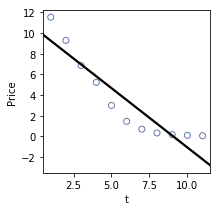

In [12]:
t = list(range(1,12))
Price = [11.54, 9.3, 6.86, 5.23, 3, 1.46, 
         0.705, 0.333, 0.179, 0.101, 0.068]
df = pd.DataFrame({'t': t, 'Price': Price})

sc = sns.regplot(x="t", y="Price", data=df, fit_reg=True, ci=None,
                 line_kws={'color': 'black'},
                 scatter_kws={'edgecolors': sns.xkcd_rgb["denim blue"], 
                              'facecolors': 'None',
                              'linewidth': 1})        
plt.show()

b) Fit the model $P_t = P_0 e^{\beta t}$, where $P_t$ is the price in period $t$. Does this model describe the data? **The fitted values are shown in green indicating that this model describes the data well.**

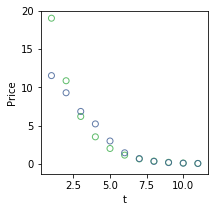

In [13]:
import statsmodels.api as sm
regr = sm.OLS(np.log(df['Price']), sm.add_constant(df['t'])).fit()
df['Fitted'] = np.exp(regr.fittedvalues)

sns.regplot(x="t", y="Fitted", data=df, fit_reg=False, ci=None,
                 line_kws={'color': 'black'},
                 scatter_kws={'edgecolors': sns.xkcd_rgb["medium green"], 
                              'facecolors': 'None',
                              'linewidth': 1})

sc = sns.regplot(x="t", y="Price", data=df, fit_reg=False, ci=None,
                 line_kws={'color': 'black'},
                 scatter_kws={'edgecolors': sns.xkcd_rgb["denim blue"], 
                              'facecolors': 'None',
                              'linewidth': 1})  
  

plt.show()

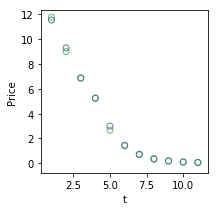

In [14]:
import statsmodels.api as sm
df['time_ind'] = np.where(df['t'] <= 4, 0, 1)
df['time_product'] = df['t'] * df['time_ind']
regr = sm.OLS(np.log(df['Price']), sm.add_constant(df[['t', 'time_ind', 'time_product']])).fit()
df['Fitted'] = np.exp(regr.fittedvalues)

sns.regplot(x="t", y="Fitted", data=df, fit_reg=False, ci=None,
                 line_kws={'color': 'black'},
                 scatter_kws={'edgecolors': sns.xkcd_rgb["medium green"], 
                              'facecolors': 'None',
                              'linewidth': 1})

sc = sns.regplot(x="t", y="Price", data=df, fit_reg=False, ci=None,
                 line_kws={'color': 'black'},
                 scatter_kws={'edgecolors': sns.xkcd_rgb["denim blue"], 
                              'facecolors': 'None',
                              'linewidth': 1})  
  

plt.show()

In [15]:
regr.summary()

/Users/alankessler/anaconda/envs/drei/lib/python3.5/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     843.4
Date:                Sun, 04 Feb 2018   Prob (F-statistic):           2.57e-09
Time:                        14:49:37   Log-Likelihood:                 10.390
No. Observations:                  11   AIC:                            -12.78
Df Residuals:                       7   BIC:                            -11.19
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.7336      0.144     18.924      0.000       2.392       3.075
t               -0.2679      0.053     -5.078      0.001      -0.393      -0.143
time_ind         1.4769      0.234      6.318      0.000       0.924       2.030
time_product    -0.3776      0.057     -6.595      0.000      -0.513      -0.242
==============================================================================
Omnibus:                        1.407   Durbin-Watson:                   1.140
Prob(Omnibus):                  0.495   Jarque-Bera (JB):                0.487
Skew:                           0.514   Prob(JB):                        0.784
Kurtosis:                       2.919   Cond. No.                         69.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**The additional coefficients improve the fit of the model. The variable $t$ suggests that as years pass, the price decreases by a percentage. The time indicator variable and time product together suggest that as time passes, the rate of decrease increases after 1991.**